# Project: Fertility Rate Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

The Gapminder datasets were selected to analyze the fertility rate. Resource links for the dataset:

* Fertility Rate dataset: https://github.com/open-numbers/ddf--gapminder--fertility_rate
* Income dataset: https://github.com/open-numbers/ddf--gapminder--gdp_per_capita_cppp
* Population dataset: https://github.com/open-numbers/ddf--gapminder--population
* Life Expectancy dataset: https://github.com/open-numbers/ddf--gapminder--life_expectancy

#### Definitions

[The total fertility rate](https://en.wikipedia.org/wiki/Total_fertility_rate) of a population is the average number of children that would be born to a woman over her lifetime.

[Per capita income](https://en.wikipedia.org/wiki/Per_capita_income) measures the average income earned per person in a given area in a specified year. It is calculated by dividing the area's total income by its total population.

[Population](https://en.wikipedia.org/wiki/Population) typically refers to the number of people in a single area, whether it be a city or town, region, country, continent, or the world.

[Life expectancy](https://en.wikipedia.org/wiki/Life_expectancy) is a statistical measure of the average time an organism is expected to live, based on the year of its birth, its current age, and other demographic factors like sex. 

### Question(s) for Analysis

#### What are the regional trends in fertility rate?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

The datasets do not contain missing values. Two main types of datasets will be used throughout the analysis. The first type is divided by countries, the second type is partitioned by regions. The regions are America, Europe, Asia, and Africa. The datasets range from 1800 to 2100 years except for the population dataset which is between 1950 and 2100.

The future **years** of data **are interpolated**, so removing data from 2022 will be needed. Datasets **column names are long**, hence renaming to shorter and compacter versions will be necessary. The **column names are not consistent** across the datasets e.g. *country* versus *geo*. A common naming convention has to be considered to merge the datasets.

In [2]:
fertility_by_country = pd.read_csv('./datasets/fertility_country.csv')
income_by_country = pd.read_csv('./datasets/income_country.csv')
life_expectancy_by_country = pd.read_csv('./datasets/life_country.csv')

fertility_by_region = pd.read_csv('./datasets/fertility_region.csv')
population_by_region = pd.read_csv('./datasets/population.csv')
countries_by_region = pd.read_csv('./datasets/geographies.csv')

### Data Cleaning

The column names were renamed with shorter and consistent names. The four world regions are called `regions`. The total fertility rate is described as `fertility`. The `geo` column name will be replaced with the more convinient `country` name. Finally the `time` column is renamed to `year`. The future years are interpolated from 2022 to 2100. The datas are selected up to 2022.

In [3]:
def trim_year(df, year):
    return df[df.year <= year]

In [4]:
year = 2022

fertility_by_country_v1 = fertility_by_country.rename(columns={'children_per_woman_total_fertility':'fertility'})
fertility_by_country_v2 = trim_year(fertility_by_country_v1, year)

income_by_country_v1 = income_by_country.rename(columns={'geo':'country', 'time':'year', 'income_per_person_gdppercapita_ppp_inflation_adjusted':'income'})
income_by_country_v2 = trim_year(income_by_country_v1, year)

life_expectancy_by_country_v1 = life_expectancy_by_country.rename(columns={'geo':'country', 'time':'year', 'life_expectancy_at_birth':'life'})
life_expectancy_by_country_v2 = trim_year(life_expectancy_by_country_v1, year)

fertility_by_region_v1 = fertility_by_region.rename(columns={'world_4region':'regions', 'children_per_woman_total_fertility':'fertility'})
fertility_by_region_v2 = trim_year(fertility_by_region_v1, year)

population_by_region_v1 = population_by_region.rename(columns={'world_4region':'regions'})
population_by_region_v2 = trim_year(population_by_region_v1, year)

countries_by_region_v1 = countries_by_region[['geo', 'four_regions']]
countries_by_region_v2 = countries_by_region_v1.rename(columns={'geo':'country', 'four_regions':'regions'})

Two datasets are created by joining multiple datasets. First, the fertility rate, income, and regions for countries datasets were merged. Second, the fertility rate, life expectancy, and regions for countries were appended together. The `country` and `year` column names were joined on. The intersection of keys merge is performed, similar to a SQL `inner` join.

In [5]:
income_and_fertility = income_by_country_v2.merge(fertility_by_country_v2, how='inner', on=['country', 'year'])
income_and_fertility_by_region = income_and_fertility.merge(countries_by_region_v2, how='inner', on='country')

life_expectancy_and_fertility = life_expectancy_by_country_v2.merge(fertility_by_country_v2, how='inner', on=['country', 'year'])
life_expectancy_and_fertility_by_region = life_expectancy_and_fertility.merge(countries_by_region_v2, how='inner', on='country')

<a id='eda'></a>
## Exploratory Data Analysis

### What are the regional trends of fertility rate?

#### Fertility rate and time by regions statistics

The past and recent fertility rate differ greatly across every regions. The most significant decrease was in America and Europe. Asia fertility rate is also decreased greatly. The fertility rate of Africa is decreased fairly.

In [6]:
def select_regions(df, region):
    return df[df.regions == region]

In [7]:
americas = select_regions(fertility_by_region_v2, 'americas')
europe = select_regions(fertility_by_region_v2, 'europe')
africa = select_regions(fertility_by_region_v2, 'africa')
asia = select_regions(fertility_by_region_v2, 'asia')

print('1800 fertility rates: America ', americas.fertility.iloc[0], ', Europe ', europe.fertility.iloc[0], ', Africa ', africa.fertility.iloc[0], ', Asia ', asia.fertility.iloc[0])
print('2022 fertility rates: America ', americas.fertility.iloc[-1], ', Europe ', europe.fertility.iloc[-1], ', Africa ', africa.fertility.iloc[-1], ', Asia ', asia.fertility.iloc[-1])

1800 fertility rates: America  6.55 , Europe  5.65 , Africa  6.5 , Asia  5.7
2022 fertility rates: America  1.92 , Europe  1.69 , Africa  4.23 , Asia  2.07


#### Fertility rate and time by regions visualization

* The fertility rate was decreased over time for every regions.
* The fertility started to decrease **rapidly** between 1960 and 1970.

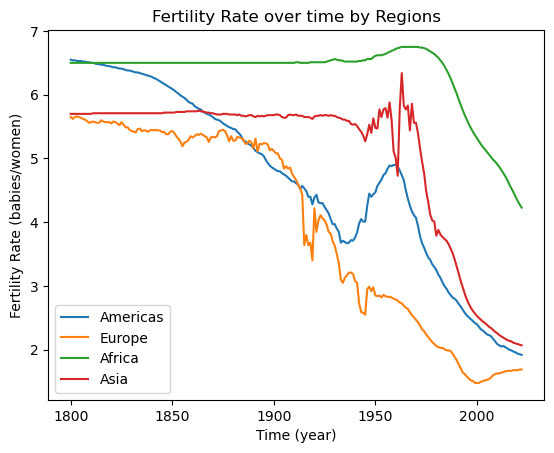

In [8]:
plt.plot(americas.year, americas.fertility, label='Americas')
plt.plot(europe.year, europe.fertility, label='Europe')
plt.plot(africa.year, africa.fertility, label='Africa')
plt.plot(asia.year, asia.fertility, label='Asia')

plt.xlabel('Time (year)')
plt.ylabel('Fertility Rate (babies/women)')
plt.title("Fertility Rate over time by Regions")
plt.legend();

#### Fertility rate distribution across world regions statistics

The average fertility rate by regions between 1800 and 2022. Europe has the lowest average fertility rate followed by America and then Asia. Lastly, Africa has the most average fertility rate over time.

In [9]:
fertility_group = fertility_by_region_v2.groupby('regions')['fertility']
fertility_mean = fertility_group.mean()
fertility_mean

regions
africa      6.315874
americas    4.676233
asia        5.057668
europe      3.959776
Name: fertility, dtype: float64

Europe and America fertility rate is less than the global average fertility rate. The fertility rate of Asia is little more than the global average. Africa fertility rate is resonably higher than the global average.

In [10]:
fertility_mean.mean()

5.002387892376682

#### Fertility rate distribution across world regions visualization

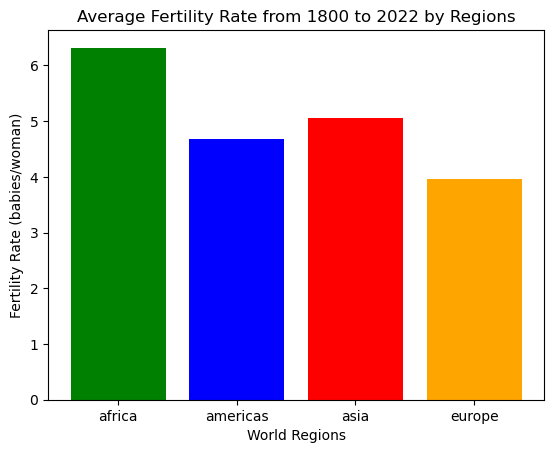

In [11]:
colors = ['green', 'blue', 'red', 'orange']

plt.bar(x=fertility_group.groups.keys(), height=fertility_mean, color=colors)

plt.xlabel('World Regions')
plt.ylabel('Fertility Rate (babies/woman)')
plt.title('Average Fertility Rate from 1800 to 2022 by Regions');

#### Income and fertility rate by regions statistics

Africa has the lowest average income per person between 1800 and 2022. The most average income is generated in Europe. The incomes of Asia and America are similiar.

In [12]:
income_and_fertility_group = income_and_fertility_by_region.groupby('regions')[['fertility', 'income']]
income_and_fertility_mean = income_and_fertility_group.mean()
income_and_fertility_mean['income']

regions
africa      1837.329347
americas    5128.766816
asia        5633.153526
europe      8855.400734
Name: income, dtype: float64

Average population in 10 million unit by regions. Asia has significantly higher average population than the other regions.

In [13]:
population_mean = population_by_region_v2.groupby('regions')['population'].mean() / 10_000_000
population_mean

regions
africa       64.668831
americas     68.556718
asia        296.438690
europe       75.137163
Name: population, dtype: float64

#### Income and fertility rate by regions visualization

* Income and fertility rate is **negatively correlated**.
* Population size and fertility rate do not have strong correlation.

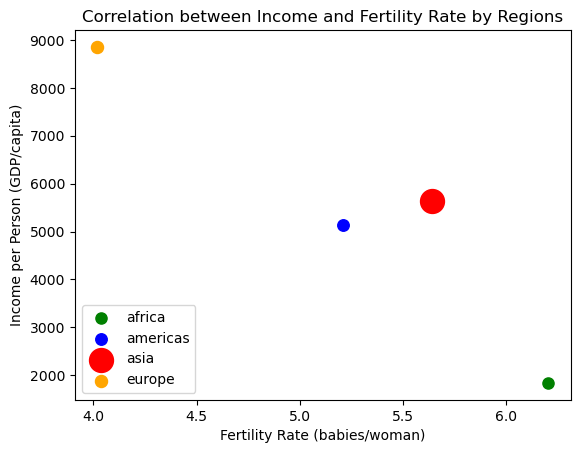

In [14]:
for i in range(len(income_and_fertility_mean)):
    plt.scatter(income_and_fertility_mean.fertility[i], income_and_fertility_mean.income[i], s=population_mean[i], c=colors[i])

plt.xlabel('Fertility Rate (babies/woman)')
plt.ylabel('Income per Person (GDP/capita)')
plt.title('Correlation between Income and Fertility Rate by Regions')
plt.legend(labels=income_and_fertility_group.groups.keys(), loc='lower left');

#### Life expectancy and fertility rate by regions statistics

The minimun fertility rate was 1.518 in Europe between 1800 and 2022. On the contrary the maximum fertility rate was 6.741 in Africa.

In [15]:
life_expectancy_and_fertility_group = life_expectancy_and_fertility_by_region.groupby(['regions', 'year'])[['fertility', 'life']]
life_expectancy_and_fertility_mean = life_expectancy_and_fertility_group.mean()
life_expectancy_and_fertility_mean.describe()

,fertility,life
count,892.000000,892.000000
mean,5.267809,44.454854
std,1.409192,15.769523
min,1.517955,15.544630
25%,4.859830,31.873333
50%,5.914545,36.012273
75%,6.259409,57.078374
max,6.741481,79.298864


Africa has the lowest average life expectancy between 1800 and 2022. The average life expectancies of Asia and America are somewhat similar. Europe's average life expectancy is the highest.

In [16]:
life_expectancy_and_fertility_by_region.groupby('regions')['life'].mean()

regions
africa      39.717033
americas    45.443461
asia        42.126285
europe      50.532637
Name: life, dtype: float64

#### Life expectancy and fertility rate by regions visualization

* Life expectancy and fertility rate **negatively correlated**.
* If the life expectancy is low (less than 31 years) then the fertility rate tends to be higher (betweem 6 and 7).
* If the life expectancy is medium (between 32 and 57 years) then the fertility rate starts to decline (between 5 and 6.5).
* If the life expectancy is high (more than 58 year) then the fertility rate decreases drastically (between 1 and 2.5).

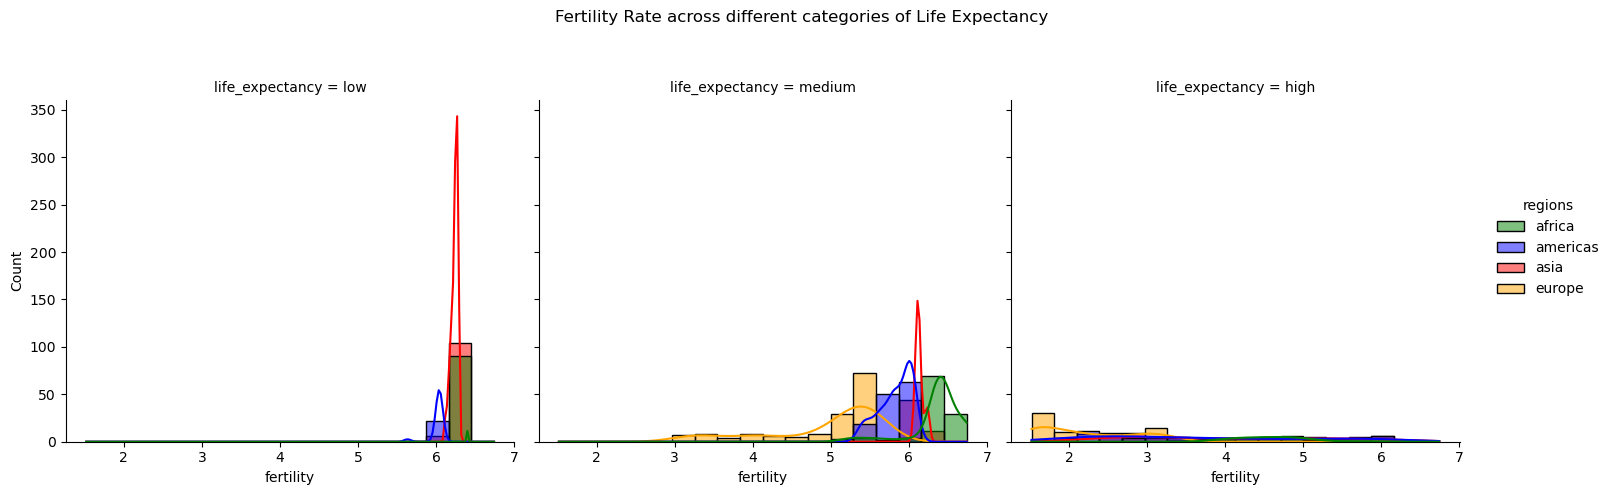

In [17]:
life_expectancy_mean = life_expectancy_and_fertility_mean.life
conditions = [
    (life_expectancy_mean < life_expectancy_mean.quantile(0.25)),
    (life_expectancy_mean >= life_expectancy_mean.quantile(0.25)) & (life_expectancy_mean < life_expectancy_mean.quantile(0.75)),
    (life_expectancy_mean >= life_expectancy_mean.quantile(0.75))
    ]

categories = ['low', 'medium', 'high']
life_expectancy_and_fertility_mean['life_expectancy'] = np.select(conditions, categories)

displot = sns.displot(data=life_expectancy_and_fertility_mean, x='fertility', hue='regions', palette=colors, col='life_expectancy', kde=True)
displot.fig.subplots_adjust(top=0.8)
displot.fig.suptitle('Fertility Rate across different categories of Life Expectancy');

<a id='conclusions'></a>
## Conclusions

Drawing broader conclusion is limited however the fertility rate was oscillated from 1914 to 1945 in Europe and America. Probably because of the [World War I](https://en.wikipedia.org/wiki/World_War_I) and [II](https://en.wikipedia.org/wiki/World_War_II). The oscillation speed of Europe was greater than America.
The fertility rate was swinged back and forth between 1957 and 1970. It could be explained by the Great [Chinese Famine](https://en.wikipedia.org/wiki/Great_Chinese_Famine).

It is also conceivable that the [development degree](https://en.wikipedia.org/wiki/Developing_country) of a regions influences the fertility rate. Africa has the most fertility rate and it is a under developed region. Less education, less life expectancy, less urbanization. Meanwhile in the developing and developed regions (Asia, Europe, America) have less fertility rate. Raising children is more expensive because of education, clothing, ententertainments and so on.

Correlation can be visualized even though whether is causation or not. It seems that if people has more income than fertility rate will decrease. Similarly the fertility rate starts decreasing as life expectancy is increasing. There is a correlation but causation is unsure. Finally, the population size does not seem to effect the fertility rate.